In [258]:
#Trivago Case Study

In [393]:
#First we load the data
import pandas as pd
import datetime
import numpy as np
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()

In [394]:
#Adv_df = pd.read_csv('Desktop/Coding/marketplace_anon_2019.csv')
Adv_df = pd.read_csv('Desktop/Coding/marketplace_anon_2019.csv',index_col='date')
#Pandas time series tools really become useful is when you begin to index data by date

In [395]:
Adv_df = Adv_df.sort_index()
Adv_df.index = pd.to_datetime(Adv_df.index)

In [396]:
#View information about data types, missing values etc. before proceeding for any analysis
Adv_df

,ttt_group,clicks_A,clicks_B,clicks_C,cost_A,cost_B,cost_C,bookings_A,bookings_B,bookings_C,booking_rev_A,booking_rev_B,booking_rev_C
date,,,,,,,,,,,,,
2019-01-01,long,4945,7970,301992,2378,4068,242810,118,153,7231,19093,23636,1190356
2019-01-01,medium,61201,8115,81676,47501,4893,65722,2373,252,3167,371986,39742,512900
2019-01-01,short,110658,62984,23897,107515,57033,19170,5359,2440,1157,815380,374662,173965
2019-01-02,long,4202,6524,284020,2022,3317,231466,101,125,6807,15838,18765,1138882
2019-01-02,medium,59130,8040,79556,45954,4869,64165,2294,250,3086,360364,39281,474731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,medium,71525,8327,84511,56156,4997,67749,2772,258,3275,417442,42194,496956
2019-12-30,long,5453,7773,342602,2626,3912,276803,130,149,8195,20947,23108,1255200
2019-12-31,long,4392,6938,303577,2105,3521,247070,105,133,7269,16539,20517,1095822


In [397]:
#Adding few summary columns for doing analysis on agrregated data
#Given Constant profit margin of 15% over revenue for each booking
#Net Profit here inddicates benefit to Advertisers minus the cost paid to Trivago
Profit_Margin = 0.15
Adv_df['TotalClicks'] = Adv_df.clicks_A+Adv_df.clicks_B+Adv_df.clicks_C
Adv_df['TotalBookings'] = Adv_df.bookings_A +Adv_df.bookings_B+Adv_df.bookings_C
Adv_df['TotalBookingsRev'] = Adv_df.booking_rev_A +Adv_df.booking_rev_B+Adv_df.booking_rev_C
Adv_df['DailyBookingConversion'] = Adv_df.TotalBookings/Adv_df.TotalClicks
Adv_df['Gross_Profit_A'] = Adv_df.booking_rev_A*Profit_Margin
Adv_df['Gross_Profit_B'] = Adv_df.booking_rev_B*Profit_Margin
Adv_df['Gross_Profit_C'] = Adv_df.booking_rev_C*Profit_Margin
Adv_df['Net_Profit_A'] = Adv_df.Gross_Profit_A - Adv_df.cost_A
Adv_df['Net_Profit_B'] = Adv_df.Gross_Profit_B - Adv_df.cost_B
Adv_df['Net_Profit_C'] = Adv_df.Gross_Profit_C - Adv_df.cost_C



In [398]:
Adv_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2019-01-01 to 2019-12-31
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ttt_group               1095 non-null   object 
 1   clicks_A                1095 non-null   int64  
 2   clicks_B                1095 non-null   int64  
 3   clicks_C                1095 non-null   int64  
 4   cost_A                  1095 non-null   int64  
 5   cost_B                  1095 non-null   int64  
 6   cost_C                  1095 non-null   int64  
 7   bookings_A              1095 non-null   int64  
 8   bookings_B              1095 non-null   int64  
 9   bookings_C              1095 non-null   int64  
 10  booking_rev_A           1095 non-null   int64  
 11  booking_rev_B           1095 non-null   int64  
 12  booking_rev_C           1095 non-null   int64  
 13  TotalClicks             1095 non-null   int64  
 14  TotalBookings         

In [399]:
#Creating 3 seprate dataframes to analyze short, medium and long term data values
Adv_Short_df = Adv_df[Adv_df.ttt_group == 'short']
Adv_Medium_df = Adv_df[Adv_df.ttt_group == 'medium']
Adv_Long_df = Adv_df[Adv_df.ttt_group == 'long']

In [400]:
Adv_Short_df = Adv_Short_df.sort_index()
Adv_Medium_df = Adv_Medium_df.sort_index()
Adv_Long_df = Adv_Long_df.sort_index()
Adv_Short_df.info()
Adv_Medium_df.info()
Adv_Long_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ttt_group               365 non-null    object 
 1   clicks_A                365 non-null    int64  
 2   clicks_B                365 non-null    int64  
 3   clicks_C                365 non-null    int64  
 4   cost_A                  365 non-null    int64  
 5   cost_B                  365 non-null    int64  
 6   cost_C                  365 non-null    int64  
 7   bookings_A              365 non-null    int64  
 8   bookings_B              365 non-null    int64  
 9   bookings_C              365 non-null    int64  
 10  booking_rev_A           365 non-null    int64  
 11  booking_rev_B           365 non-null    int64  
 12  booking_rev_C           365 non-null    int64  
 13  TotalClicks             365 non-null    int64  
 14  TotalBookings          

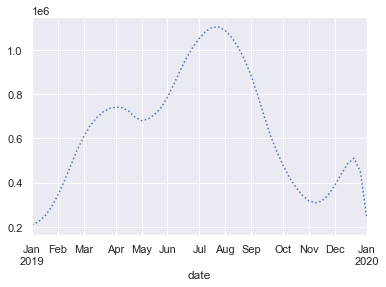

In [373]:
#For resampling of time series data at a higher or lower frequency we are using resampling method name resample()
#Daily Clicks across the categories
#Aggrigating them weekly and ploting on time series to see the distribution over the Weeks/Months.
Adv_TotalClicks_df = Adv_df['TotalClicks']
Adv_TotalClicks_df.resample('W').mean().plot(style=':')
plt.show()
#Distribution below depicts that there is a surge in enquiries/interest in terms of clicks in the period of May-Sep 
#Click  count Peaking in July

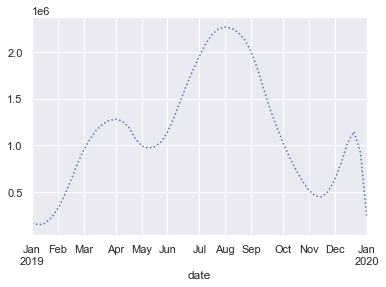

In [374]:
#Daily Clicks in short-term
Adv_Short_TotalClicks_df = Adv_Short_df['TotalClicks']
Adv_Short_TotalClicks_df.resample('W').mean().plot(style=':')
plt.show()
#Distribution below depicts that there is a surge in enquiries in terms of clicks in the period of Jun-Oct 
#Click  count Peaking in July & Aug
#Similar to above overall clicks distribution but shifted to right

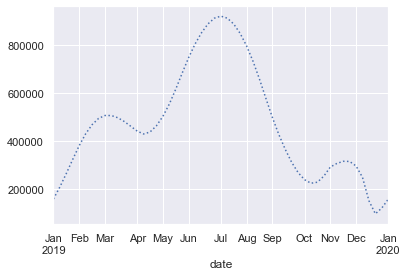

In [375]:
#Daily Clicks in medium-term
Adv_Medium_TotalClicks_df = Adv_Medium_df['TotalClicks']
Adv_Medium_TotalClicks_df.resample('W').mean().plot(style=':')
plt.show()
#Distribution below depicts that there is a surge in enquiries in terms of clicks in the period of May-Sep 
#Click  count Peaking in Jun-July
#Almost same to the graph of over all clicks

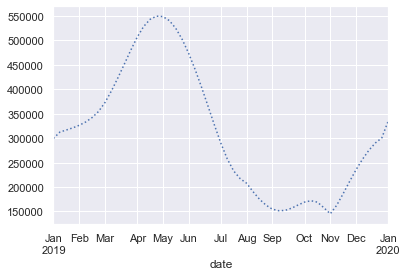

In [376]:
#Daily Clicks in long-term
Adv_Long_TotalClicks_df = Adv_Long_df['TotalClicks']
Adv_Long_TotalClicks_df.resample('W').mean().plot(style=':')
plt.show()
#Distribution below depicts that there is a surge in enquiries in terms of clicks in the period of Mar-Jun 
#Click  count Peaking in Apr-May

In [377]:
#Conclusion
# Most of the interest shown by users is March to Oct
#When we analize it ttt_group wise, we can clearly see that demand for long term, medium term and short term varies
#This variation has a time lag which is equal to the definition (No. of days from click to check-in)
#So as per the clicks count goes, there is a demand for check-in dates belonging to Month of July-Aug
#These are summar vaccations in Schools in Europe
#Data in terms of number of clicks across the Months validate the logic of short term, medium term and long term bookingd


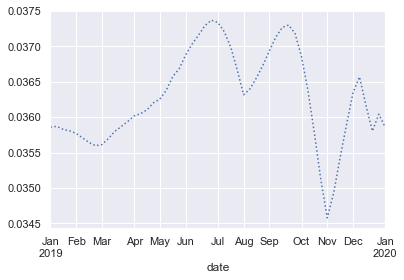

In [378]:
#Daily booking conversion for bookings across the categories
Adv_DailyBookingConversion_df = Adv_df['DailyBookingConversion']
Adv_DailyBookingConversion_df.resample('W').mean().plot(style=':')

plt.show()

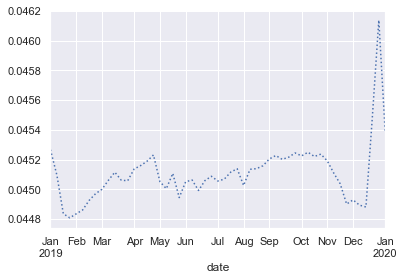

In [379]:
#Short term booking


Adv_Short_DailyBookingConversion_df = Adv_Short_df['DailyBookingConversion']
Adv_Short_DailyBookingConversion_df.resample('W').mean().plot(style=':')

plt.show()

#Result show major surge in booking conversion after mid December
#Pluasible Reason can be christmas is 0-14 days away (Which is the no. of days between click and check-in)
#We need to see that same pattern is observed in Midum and Long term booking to support the arguement

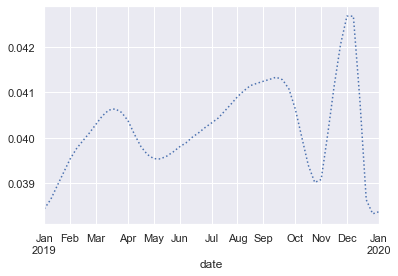

In [380]:
#Medium term booking
Adv_Medium_DailyBookingConversion_df = Adv_Medium_df['DailyBookingConversion']
Adv_Medium_DailyBookingConversion_df.resample('W').mean().plot(style=':')
plt.show()

#Result shows Major surge from late october to last Nov (15-60 days away from christmas)

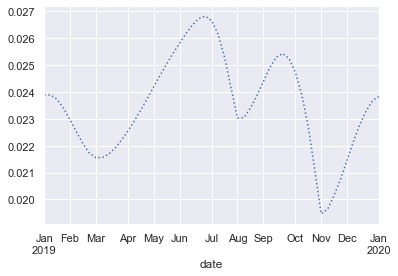

In [381]:
#Long term booking
Adv_Long_DailyBookingConversion_df = Adv_Long_df['DailyBookingConversion']
Adv_Long_DailyBookingConversion_df.resample('W').mean().plot(style=':')
plt.show()
#There is huge dip after Oct (60 days prior to Christmas)

In [382]:
#By seeing conversion rate of Bookings / Clicks we can see that summer vaccations of Schools do not much impact here
#Major impact is of the Festive season around Cristmas week.
#Although the avg number of clicks are not huge but conversion is cvery much significant.

In [ ]:
#Guessing the Market with informing the guess - from above analysis it looks like the interest/enquiry 
#by clicking and bookings are being done by coporate employees with families for summer/winter vaccations.

In [383]:
#Question 2 - Advertiser performance

In [384]:
#Here we need to agreegate the Net Profit for each adveriser. 

Profit_Adv_A = sum(Adv_df['Net_Profit_A'])
Profit_Adv_B = sum(Adv_df['Net_Profit_B'])
Profit_Adv_C = sum(Adv_df['Net_Profit_C'])
print(Profit_Adv_A)
print(Profit_Adv_B)
print(Profit_Adv_C)


49489193.200000025
280939.3999999961
902586.5000000034


In [391]:
#In above analysis it seems that all firms are making profit by running this campaign 
#Order of success seems to be Advertiser A then C then B

#per click net profit
Per_Click_Profit_Total_A  = Profit_Adv_A / sum(Adv_df['clicks_A'])
Per_Click_Profit_Total_B  = Profit_Adv_A / sum(Adv_df['clicks_B'])
Per_Click_Profit_Total_C  = Profit_Adv_A / sum(Adv_df['clicks_C'])
print(Per_Click_Profit_Total_A)
print(Per_Click_Profit_Total_B)
print(Per_Click_Profit_Total_C)



0.15558415701538741
0.3380261900732516
0.20505771391445107


In [392]:
#It seems that Although B is earning less Net Profit but once the user clicks B's advertisement the per click profit is Best

#Now we need to see if profit sustains across all categories





In [387]:

#per click net profit for Short term
Per_Click_Profit_Short_A  = sum(Adv_Short_df['Net_Profit_A']) / sum(Adv_Short_df['clicks_A'])
Per_Click_Profit_Short_B  = sum(Adv_Short_df['Net_Profit_B']) / sum(Adv_Short_df['clicks_B'])
Per_Click_Profit_Short_C  = sum(Adv_Short_df['Net_Profit_C']) / sum(Adv_Short_df['clicks_C'])

print(Per_Click_Profit_Short_A)
print(Per_Click_Profit_Short_B)
print(Per_Click_Profit_Short_C)

0.1625779265003231
-0.0057883483071659615
0.3212461976415295


In [388]:
#per click net profit for Medium term
Per_Click_Profit_Medium_A  = sum(Adv_Medium_df['Net_Profit_A']) / sum(Adv_Medium_df['clicks_A'])
Per_Click_Profit_Medium_B  = sum(Adv_Medium_df['Net_Profit_B']) / sum(Adv_Medium_df['clicks_B'])
Per_Click_Profit_Medium_C  = sum(Adv_Medium_df['Net_Profit_C']) / sum(Adv_Medium_df['clicks_C'])

print(Per_Click_Profit_Medium_A)
print(Per_Click_Profit_Medium_B)
print(Per_Click_Profit_Medium_C)

0.13867197975263432
0.1549197251324273
0.1447116251617269


In [389]:
#per click net profit for Long term
Per_Click_Profit_Long_A  = sum(Adv_Long_df['Net_Profit_A']) / sum(Adv_Long_df['clicks_A'])
Per_Click_Profit_Long_B  = sum(Adv_Long_df['Net_Profit_B']) / sum(Adv_Long_df['clicks_B'])
Per_Click_Profit_Long_C  = sum(Adv_Long_df['Net_Profit_C']) / sum(Adv_Long_df['clicks_C'])

print(Per_Click_Profit_Long_A)
print(Per_Click_Profit_Long_B)
print(Per_Click_Profit_Long_C)

0.08428987898114017
-0.06069419750932581
-0.25121216125552365


In [390]:
#Performance and recommendations - 

In [ ]:
# 1. Advertiser B  is incurring loss in short and Long term bookings by running this campaign
# 2. Advertiser C is incurring loss in  Long term bookings by running this campaign

In [ ]:
#Above Analysis suggests that the offerings given by B and C for long term and for B in short term too are not that attractive.
#Either they may analyse the market better in terms of rates/facilities offered or they may completely focus on the markets which give them highest profit  per click
#Such market for C is short term, for B it is medium term Where as  for A it can be prioritised -  short > medium > Long


In [3]:
! jupyter nbconvert --to html Trivagofinal.ipynb

[NbConvertApp] Converting notebook Trivagofinal.ipynb to html
[NbConvertApp] Writing 513414 bytes to Trivagofinal.html
